In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated

<bound method DataFrame.duplicated of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  

In [7]:
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace =True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first= True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 1)

In [16]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True


In [17]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,False,False,True
3850,680,34,3,143292.95,1,1,0,66526.01,False,False,True
4962,531,42,2,0.00,2,0,1,90537.47,False,False,False
3886,710,34,8,147833.30,2,0,1,1561.58,True,False,True
5437,543,30,6,73481.05,1,1,1,176692.65,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,False,True,False
162,800,49,7,108007.36,1,0,0,47125.11,False,False,False
7903,567,34,10,0.00,2,0,1,161571.79,False,True,True
2242,621,30,2,101014.08,2,1,1,165257.31,True,False,False


In [18]:
y_train.value_counts()

Exited
0    6378
1    1622
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()

model.add(Dense(3, activation= 'sigmoid', input_dim = 11))
model.add(Dense(1, activation ='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

In [27]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5496
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4881
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4774
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4595
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4508
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4431
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4320
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4325
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4320
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4190


In [28]:
model.layers[0].get_weights()

[array([[ 0.20456171,  0.02355125,  0.13844955],
        [-2.2160804 , -0.69773424,  0.89335746],
        [-0.02700601,  0.06919802, -0.03896005],
        [ 0.01459731, -0.3820064 ,  0.71850395],
        [ 0.03407644,  0.07648432,  0.04125834],
        [-0.14776812,  0.25676408,  0.52140474],
        [ 0.04053163,  1.0643424 , -0.3982228 ],
        [-0.22349706,  0.1369702 ,  0.22890803],
        [-0.39807588, -0.4886587 ,  0.7586384 ],
        [-0.04403491,  0.04644822,  0.46557114],
        [ 0.11777385,  0.540307  , -0.62268084]], dtype=float32),
 array([ 0.26617017,  0.26653895, -0.10105808], dtype=float32)]

In [30]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
y_pred = np.where(y_log>0.5,1,0)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8125

# Accuracy is 81.25%

# Improving Accuracy

In [34]:
model = Sequential()

model.add(Dense(11, activation= 'relu', input_dim = 11))
model.add(Dense(11, activation= 'relu'))
model.add(Dense(1, activation ='sigmoid'))

# changing dense from 3 to 11
# changing activation function to relu

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7762 - loss: 0.5395
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7938 - loss: 0.4499
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.4211
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8215 - loss: 0.4174
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.3847
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8484 - loss: 0.3684
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8553 - loss: 0.3570
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8532 - loss: 0.3550
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.3468
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8538 - loss: 0.3477


# Adding validation and changing epochs to 100

In [38]:
model.fit(X_train_scaled, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8534 - loss: 0.3459 - val_accuracy: 0.8531 - val_loss: 0.3452
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8686 - loss: 0.3324 - val_accuracy: 0.8506 - val_loss: 0.3467
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8597 - loss: 0.3484 - val_accuracy: 0.8487 - val_loss: 0.3481
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8629 - loss: 0.3329 - val_accuracy: 0.8537 - val_loss: 0.3465
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.3381 - val_accuracy: 0.8519 - val_loss: 0.3464
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8627 - loss: 0.3373 - val_accuracy: 0.8500 - val_loss: 0.3472
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8717 - loss: 0.3323 - val_accuracy: 0.8512 - val_loss: 0.3473
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3337 - val_accu

In [39]:
model.layers[0].get_weights()

[array([[ 0.00435887,  0.02037504,  0.02353268,  0.17085569, -0.19570412,
         -0.37415853,  0.19508229,  0.21554816, -0.01207283,  0.27653763,
          0.6483735 ],
        [ 0.6255094 , -0.69016665, -0.7235369 ,  0.07483748,  0.01045696,
         -0.41407394,  0.49586502, -0.6130119 ,  0.8480237 , -0.33218187,
         -0.3444876 ],
        [ 0.13857175,  0.27003127,  0.13037188,  0.13266324,  0.18550205,
          0.09455158,  0.0730033 , -0.11109394,  0.14547718,  0.2068748 ,
          0.52743137],
        [-0.00732   , -0.01930448,  0.5780946 ,  0.19861598, -1.3937953 ,
         -0.46022305,  0.15575525, -0.17895581, -0.16852267, -0.28424266,
         -0.29286203],
        [ 0.48840857,  0.09777235,  0.15478584,  1.4204636 , -0.33615404,
          0.37464923, -0.8282588 ,  0.1648901 , -0.02513774,  0.06458965,
         -0.01941538],
        [ 0.22227348,  0.1650088 ,  0.27897105, -0.1842067 , -0.10451622,
          0.2113179 , -0.30074266, -0.33401328, -0.1396782 , -0.2101871

In [40]:
model.layers[1].get_weights()

[array([[-1.10219106e-01, -6.84225857e-01, -7.44554341e-01,
         -2.26822004e-01,  2.09240377e-01,  4.37497705e-01,
          6.83774889e-01,  8.69228899e-01, -9.04948041e-02,
          3.96645010e-01, -5.06744087e-02],
        [ 2.30603278e-01,  2.61774182e-01, -1.48438439e-01,
          3.75615418e-01, -4.72268686e-02, -6.36429965e-01,
          3.57171923e-01,  4.06904727e-01,  3.59622747e-01,
          2.87583202e-01,  2.17818215e-01],
        [ 4.14017260e-01,  6.18850812e-02,  3.87341559e-01,
         -1.72601596e-01,  1.14688471e-01, -7.76291549e-01,
          3.63182247e-01, -9.24013555e-01, -5.71362115e-02,
          5.05070865e-01,  3.62032391e-02],
        [-3.01673084e-01, -1.49158883e+00, -8.90004218e-01,
         -1.58371329e-01,  1.51585966e-01,  2.98568070e-01,
         -5.33917904e-01, -2.73481816e-01,  1.01054859e+00,
          6.11309409e-01, -4.01458412e-01],
        [-7.25340486e-01,  4.41378474e-01,  5.52552938e-01,
          5.91361038e-02,  3.60872686e-01, -

In [41]:
model.layers[2].get_weights()

[array([[-0.5738067 ],
        [ 1.0517085 ],
        [ 0.7067086 ],
        [-0.43819577],
        [-0.25189963],
        [ 2.0076337 ],
        [-0.4552953 ],
        [-1.0913422 ],
        [ 1.1751834 ],
        [ 0.46474135],
        [-0.5281793 ]], dtype=float32),
 array([-0.26397225], dtype=float32)]

In [42]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [43]:
y_pred = np.where(y_log>0.5,1,0)


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8645

# Accuracy is 86.45%
# Accuracy changes to 86.45% from 81.25%

# Visualization

In [45]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8660 - loss: 0.3198 - val_accuracy: 0.8494 - val_loss: 0.3496
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.3063 - val_accuracy: 0.8550 - val_loss: 0.3498
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8677 - loss: 0.3134 - val_accuracy: 0.8506 - val_loss: 0.3490
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8677 - loss: 0.3191 - val_accuracy: 0.8494 - val_loss: 0.3507
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8661 - loss: 0.3190 - val_accuracy: 0.8519 - val_loss: 0.3482
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.3105 - val_accuracy: 0.8494 - val_loss: 0.3509
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8687 - loss: 0.3224 - val_accuracy: 0.8512 - val_loss: 0.3489
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8678 - loss: 0.3215 - val_accu

In [46]:
import matplotlib.pyplot as plt

In [48]:
history.history

{'accuracy': [0.8682812452316284,
  0.8701562285423279,
  0.8675000071525574,
  0.8692187666893005,
  0.867968738079071,
  0.8675000071525574,
  0.8678125143051147,
  0.8681250214576721,
  0.8682812452316284,
  0.8687499761581421,
  0.8704687356948853,
  0.8681250214576721,
  0.8696874976158142,
  0.8692187666893005,
  0.8687499761581421,
  0.8690624833106995,
  0.8700000047683716,
  0.8696874976158142,
  0.8681250214576721,
  0.8690624833106995,
  0.8676562309265137,
  0.8693749904632568,
  0.8685937523841858,
  0.8690624833106995,
  0.8690624833106995,
  0.8696874976158142,
  0.8700000047683716,
  0.8704687356948853,
  0.870312511920929,
  0.8698437213897705,
  0.8707812428474426,
  0.8685937523841858,
  0.8684375286102295,
  0.8690624833106995,
  0.8682812452316284,
  0.8685937523841858,
  0.8692187666893005,
  0.8696874976158142,
  0.8692187666893005,
  0.8682812452316284,
  0.8698437213897705,
  0.8682812452316284,
  0.8706250190734863,
  0.8690624833106995,
  0.8707812428474426,


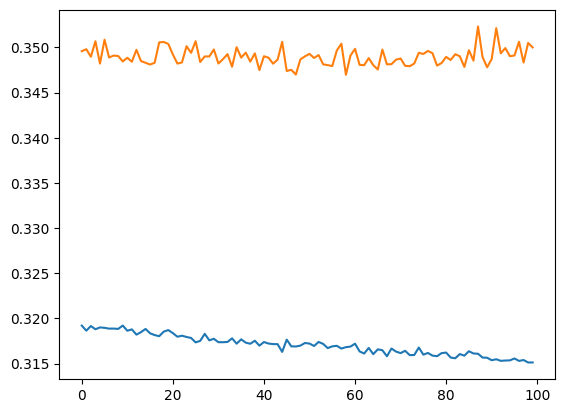

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


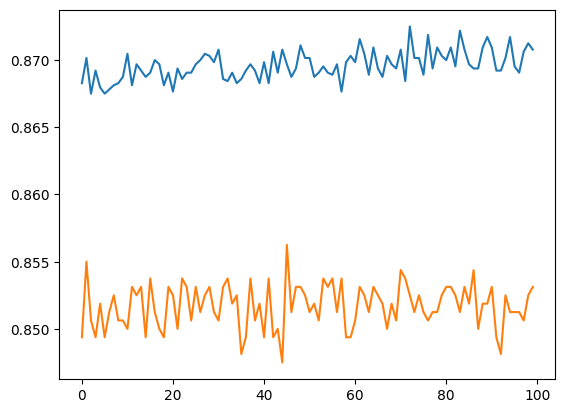

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
